In [1]:
# Load necessary library and module
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd

In [22]:
bank= pd.read_csv('dataset/review_digitalbank_newest.csv');


ParserError: Error tokenizing data. C error: Expected 3 fields in line 19, saw 5


In [10]:
bank.tail()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
9313,36179793-b1cf-4e6f-bb3a-3acd01d8eae9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Cool apps! Easy to use..,5,2,NaN,2018-05-12 08:10:12,NaN,NaN,NaN,newest,com.bank.danamon
9314,9128e6ba-bdc6-4c1e-ac7e-21c27634b0a3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,App yang nggak ribet dan mudah diakses,5,2,NaN,2018-05-12 08:08:15,NaN,NaN,NaN,newest,com.bank.danamon
9315,a43b1a2c-4d2d-4fa3-8c91-4ea97decfef3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Awesome... Quick, Responsive and User friendly...",5,5,1.0,2018-04-15 08:36:16,NaN,NaN,1.0,newest,com.bank.danamon
9316,54ca9e2e-47a3-48e5-b4fd-4e318c7e507e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Wow, gampang pakenya. Keep update ya.",5,6,1.0,2018-04-15 06:00:45,NaN,NaN,1.0,newest,com.bank.danamon
9317,f43ac686-ab3a-4b83-ac1d-104e4ac7b8f3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Cakep... Sukses terus danamon,5,5,1.0,2018-04-15 05:28:08,NaN,NaN,1.0,newest,com.bank.danamon


In [5]:
## Know the dataset

bank.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'sortOrder', 'appId'],
      dtype='object')

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              9318 non-null   object
 1   userName              9318 non-null   object
 2   userImage             9318 non-null   object
 3   content               9318 non-null   object
 4   score                 9318 non-null   int64 
 5   thumbsUpCount         9318 non-null   int64 
 6   reviewCreatedVersion  8117 non-null   object
 7   at                    9318 non-null   object
 8   replyContent          7343 non-null   object
 9   repliedAt             7343 non-null   object
 10  appVersion            8117 non-null   object
 11  sortOrder             9318 non-null   object
 12  appId                 9318 non-null   object
dtypes: int64(2), object(11)
memory usage: 946.5+ KB


In [12]:
bank.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
sortOrder               object
appId                   object
dtype: object

In [13]:
bank.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1201
at                         0
replyContent            1975
repliedAt               1975
appVersion              1201
sortOrder                  0
appId                      0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

<Axes: >

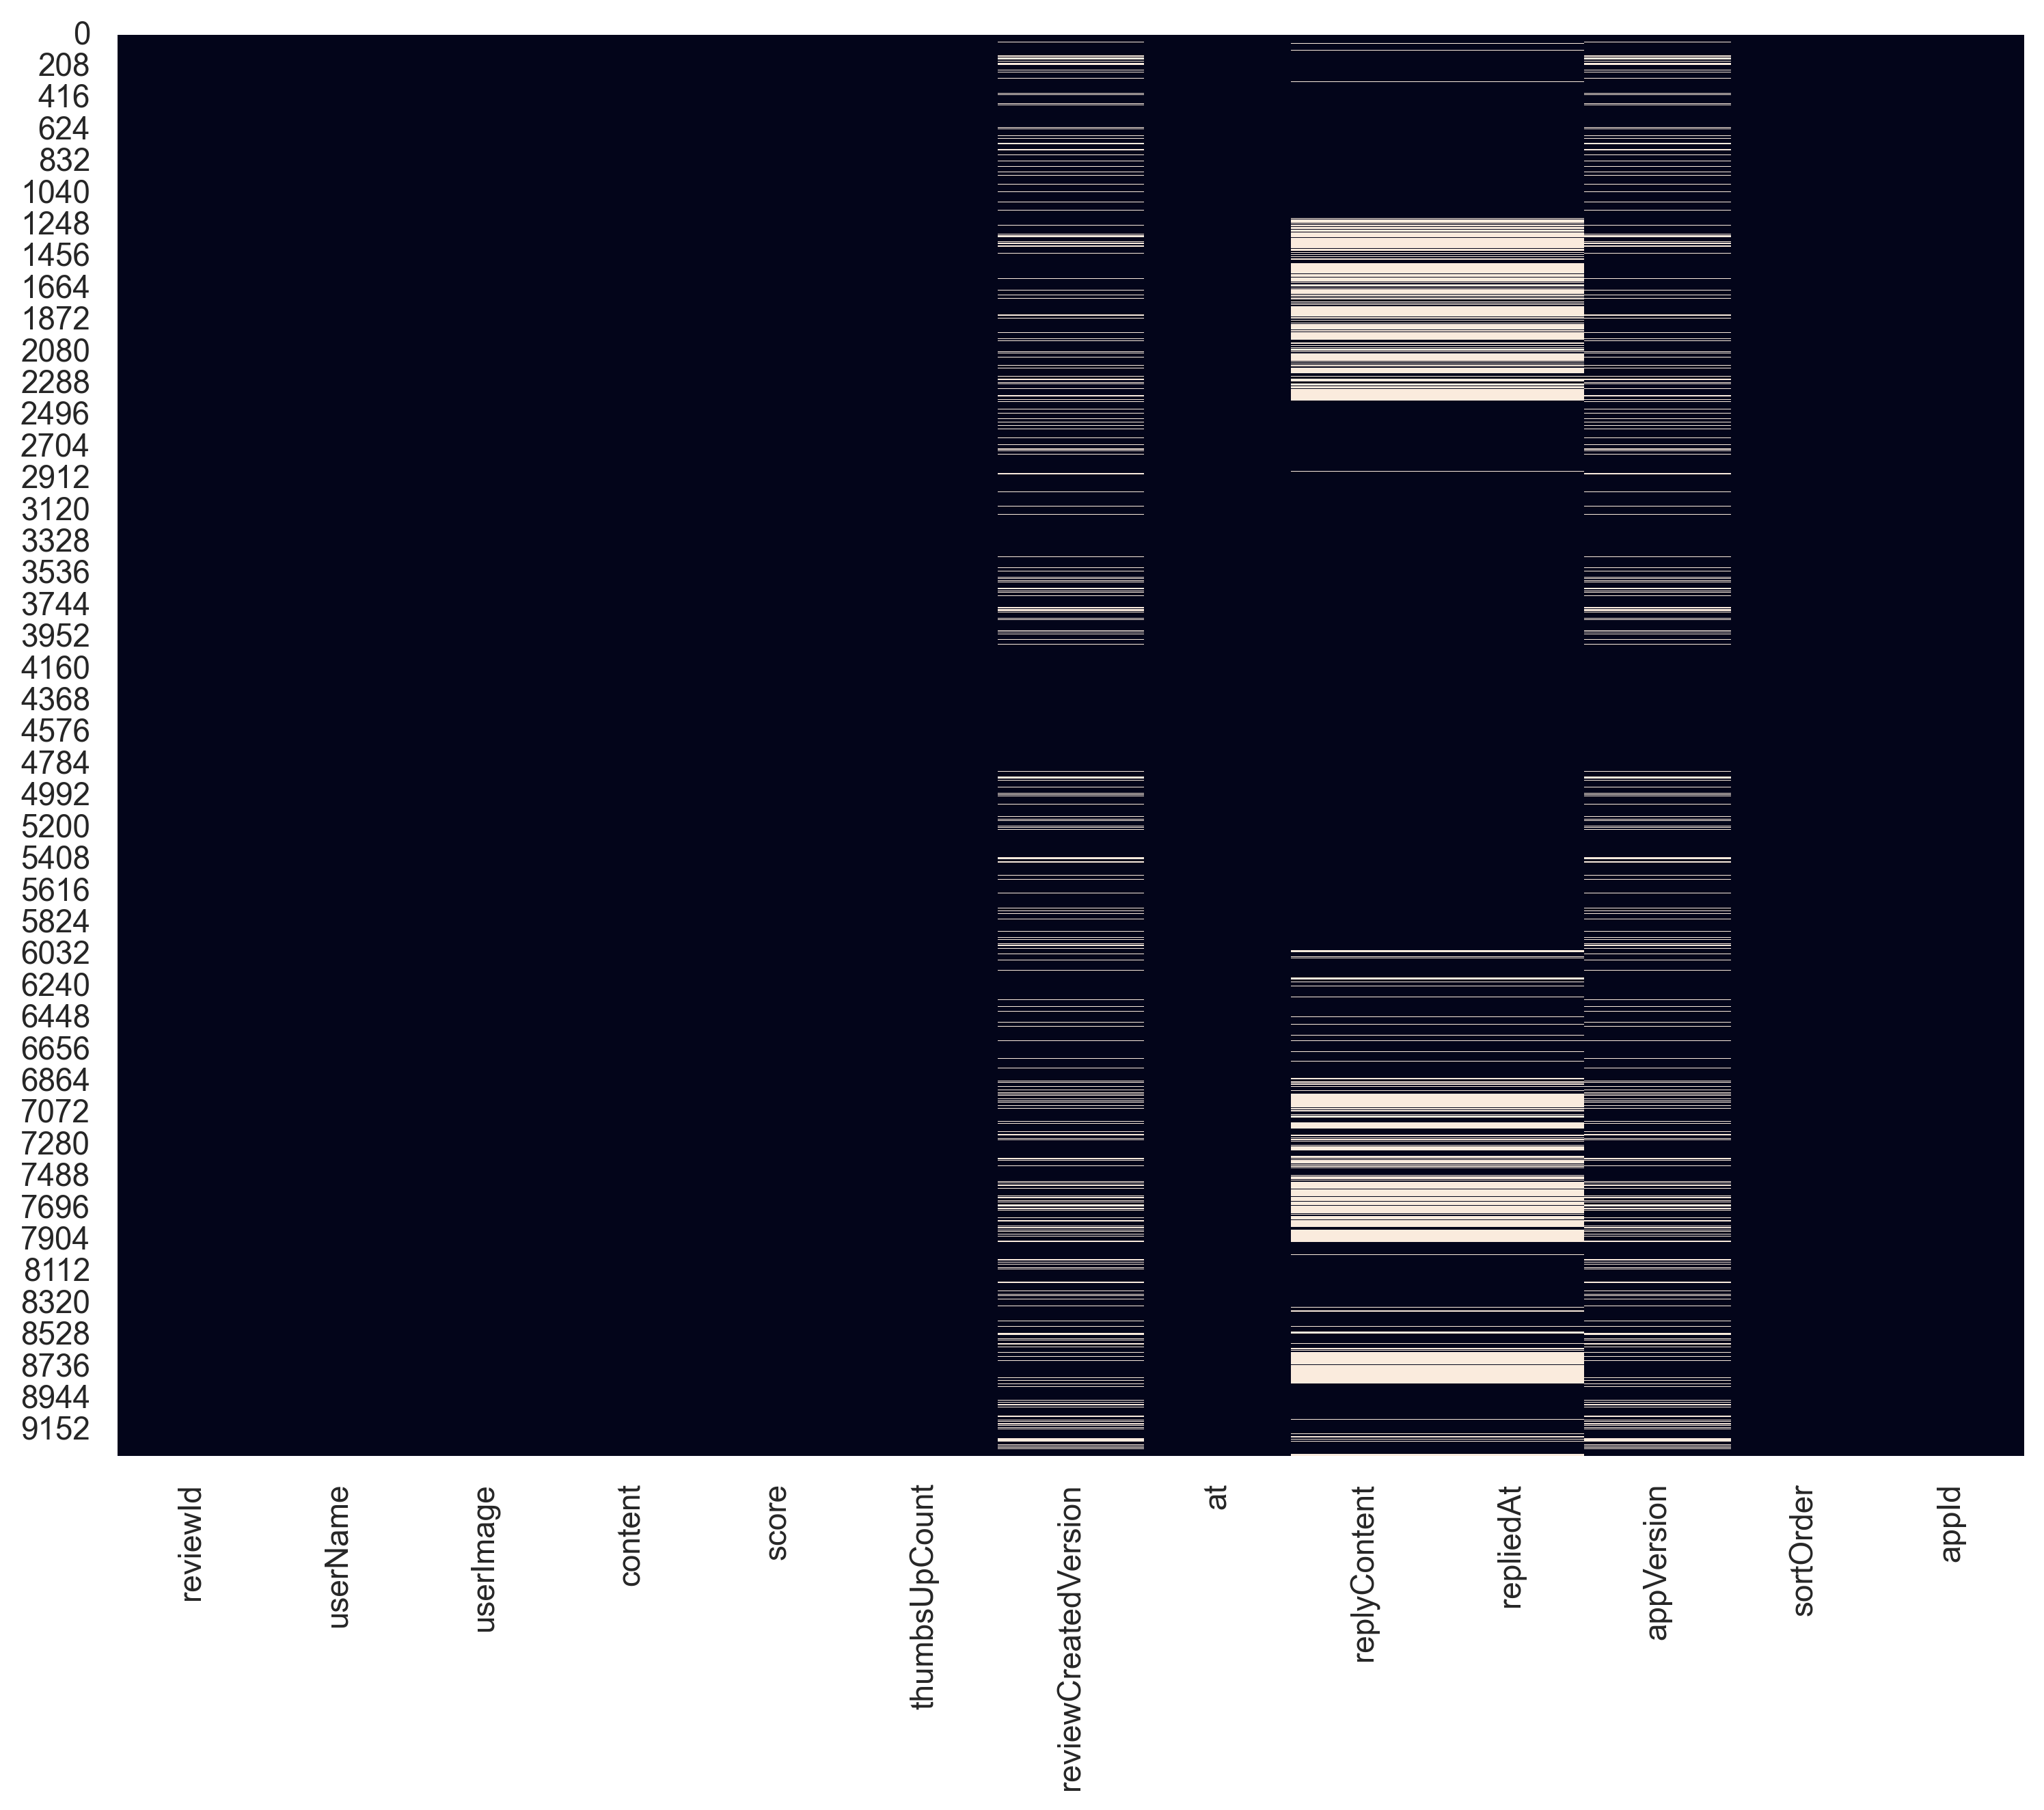

In [16]:


sns.heatmap(bank.isnull(), cbar=False)





I'm going to use the median value for missing data in the rating column. Note that the median is more robust than the mean for the outlier values.


In [17]:
rating_median = bank["score"].median()
print(rating_median)
bank["score"].fillna(rating_median, inplace=True)

3.0


In [18]:


# Let's remove the other missing data as it is very little.

bank.dropna(inplace=True)



In [28]:


# Let's take a look at missing data again.

bank.isnull().sum().sum()



0

In [29]:
#check is null in percent
(bank.isnull().sum()/(len(bank)))*100

reviewId                0.0
userName                0.0
userImage               0.0
content                 0.0
score                   0.0
thumbsUpCount           0.0
reviewCreatedVersion    0.0
at                      0.0
replyContent            0.0
repliedAt               0.0
appVersion              0.0
sortOrder               0.0
appId                   0.0
dtype: float64

In [20]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6459 entries, 0 to 9308
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6459 non-null   object
 1   userName              6459 non-null   object
 2   userImage             6459 non-null   object
 3   content               6459 non-null   object
 4   score                 6459 non-null   int64 
 5   thumbsUpCount         6459 non-null   int64 
 6   reviewCreatedVersion  6459 non-null   object
 7   at                    6459 non-null   object
 8   replyContent          6459 non-null   object
 9   repliedAt             6459 non-null   object
 10  appVersion            6459 non-null   object
 11  sortOrder             6459 non-null   object
 12  appId                 6459 non-null   object
dtypes: int64(2), object(11)
memory usage: 706.5+ KB


In [21]:
# Handling the review column

bank["content"].describe()

count     6459
unique    4720
top       Good
freq        22
Name: content, dtype: object

In [22]:
bank['score'].describe().round()

count    6459.0
mean        3.0
std         1.0
min         1.0
25%         2.0
50%         3.0
75%         4.0
max         5.0
Name: score, dtype: float64

In [23]:
print(len(bank['content'].unique()))
#bank['content'].unique()

4720


In [24]:
print(len(bank['thumbsUpCount'].unique()))
bank['thumbsUpCount'].unique()

124


array([ 93,  13,   0,   1,  16,   6,   3,   4,   5,  20,  11,  12,  10,
         7,  35,   2,   9,  48,  23,  45,  15,   8,  32,  24,  27,  19,
        26, 150,  41,  42,  38,  43,  14, 113,  97,  64,  18,  44,  66,
       170,  22,  84,  71, 216,  95, 100,  30,  62,  75,  49,  59, 161,
        70,  94,  34,  31,  81,  28,  39,  54,  40,  89,  33,  72,  47,
        36,  57,  25,  17,  61, 105,  74,  63, 525, 356, 177, 115, 335,
       189, 153, 264, 145,  52, 205,  29,  51,  55, 107, 109, 188,  92,
       393, 127,  98, 255, 168,  53,  58, 179,  46, 128, 154, 119,  96,
        21,  37, 181,  56,  83,  67, 146, 200,  73, 112,  85, 180, 104,
        60,  80,  69, 282,  99, 164, 234], dtype=int64)

In [27]:
#check duplication
bank.nunique()

reviewId                4800
userName                4516
userImage               4529
content                 4720
score                      5
thumbsUpCount            124
reviewCreatedVersion     440
at                      4800
replyContent            3391
repliedAt               4800
appVersion               440
sortOrder                  2
appId                     10
dtype: int64

In [30]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
score,6459.0,2.955101,1.366603,1.0,2.0,3.0,4.0,5.0
thumbsUpCount,6459.0,4.285183,19.766713,0.0,0.0,0.0,1.0,525.0


In [31]:
# bank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewId,6459,4800,457d4c47-8ace-4279-a529-e04a7687b201,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userName,6459,4516,A Google user,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userImage,6459,4529,https://play-lh.googleusercontent.com/EGemoI2N...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content,6459,4720,Good,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,6459.0,NaN,NaN,NaN,2.955101,1.366603,1.0,2.0,3.0,4.0,5.0
thumbsUpCount,6459.0,NaN,NaN,NaN,4.285183,19.766713,0.0,0.0,0.0,1.0,525.0
reviewCreatedVersion,6459,440,1.3.0,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
at,6459,4800,2022-11-27 15:05:55,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
replyContent,6459,3391,"Hai Sahabat Allo, mohon maaf untuk ketidaknyam...",84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,6459,4800,2022-11-27 16:18:35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
